# Random Forest 

# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
import seaborn as sns

# read csv

In [2]:
comments = pd.read_csv(r"C:\Users\Reza\Desktop\NLP_Classifier with SVM and Rainforest_Rezapour(98213017)\Instagram labeled comments.csv").drop("Unnamed: 0", axis=1).reset_index(drop=True)

print(comments.shape)
comments.columns
comments.dtypes




(8512, 2)


comment      object
sentiment     int64
dtype: object

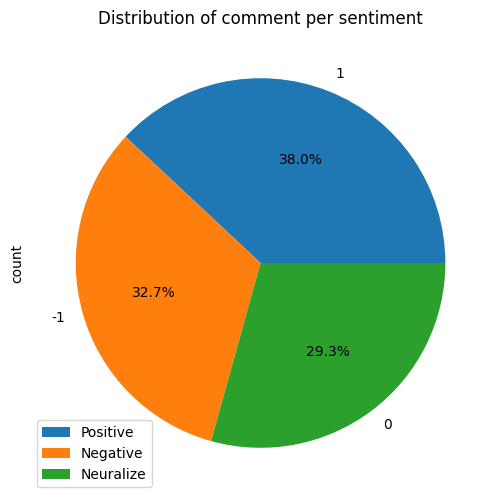

In [3]:
comments['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of comment per sentiment",labels=['1','-1' ,'0'],autopct='%1.1f%%')
labels=["Positive","Negative" , "Neuralize"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

# do Preprocess

In [4]:
with open(r"C:\Users\Reza\Desktop\NLP_Classifier with SVM and Rainforest_Rezapour(98213017)\stopwords.txt", encoding="utf8") as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [line.replace('\n', '') for line in stopwords]

In [5]:
import hazm
from hazm import word_tokenize
stemmer = hazm.Stemmer()

In [6]:
dataset = pd.DataFrame(columns=('procced_comment','sentimentt') )


In [7]:
for index, row in comments.iterrows():
    col_com = row['comment']
    col_sen = row['sentiment']
    preprocced_comment_tokenized = word_tokenize(col_com)
    preprocced_comment_tokenized_filtered = [w for w in preprocced_comment_tokenized if not w in stopwords]
    preprocced_comment_tokenized_filtered_stemmed = [stemmer.stem(w) for w in preprocced_comment_tokenized_filtered]
    dataset.loc[index] = {
        'procced_comment': ' '.join(preprocced_comment_tokenized_filtered_stemmed).replace('\r', '') ,
         'sentimentt' : col_sen
             
    }

In [8]:
dataset.head()

,procced_comment,sentimentt
0,رشیدپور هفته NUM۲ بچه پسر لحظه دنیا اومدن دخ خ...,1
1,چقدر دزد باحال بود😁 😁 😁 😁 😁 😁 🌹,1
2,سلا ممکنه کلمه ت اسکن برنامتون نکنید جالب مجنا...,-1
3,پول اینترنت گوش هزینه بچ کن,0
4,رشید پور روستا بن گو یخ زده شورا دهیار . نفر ک...,-1


In [9]:
file_path = r"C:\Users\Reza\Desktop\NLP_Classifier with SVM and Rainforest_Rezapour(98213017)\new_rf_dataset.csv"
dataset.to_csv(file_path , index= False)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [11]:
X = vectorizer.fit_transform(dataset['procced_comment'])
y= dataset['sentimentt']

In [12]:
X.shape

(8512, 14446)

In [13]:
len(y)

8512

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = None , random_state=None)


In [20]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100 , random_state=0 , criterion='entropy' )
text_classifier.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [21]:
predictiion = text_classifier.predict(X_test)
print(predictiion)

print(X_test[1])

[ 0 -1  1 ... -1  1  0]
  (0, 2404)	0.4976282515689129
  (0, 459)	0.22451623570577545
  (0, 4989)	0.2543677325144894
  (0, 918)	0.24405682930817657
  (0, 12687)	0.22577088889130992
  (0, 5308)	0.17812336008607438
  (0, 5433)	0.2649545241389504
  (0, 9013)	0.26103890207664693
  (0, 11283)	0.2313244956213429
  (0, 9029)	0.16219478494190342
  (0, 3652)	0.2379956651835004
  (0, 8894)	0.17101149656643364
  (0, 954)	0.20904553063085796
  (0, 11313)	0.19190919139720744
  (0, 4031)	0.17634198592480116
  (0, 4272)	0.17634198592480116
  (0, 9461)	0.1705226000555764
  (0, 12794)	0.09843459609299617
  (0, 5933)	0.09723548905838207


In [22]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
print(classification_report(y_test , predictiion))
print(accuracy_score(y_test , predictiion))

              precision    recall  f1-score   support

          -1       0.71      0.75      0.73       782
           0       0.63      0.48      0.55       619
           1       0.62      0.71      0.66       727

    accuracy                           0.66      2128
   macro avg       0.65      0.65      0.65      2128
weighted avg       0.66      0.66      0.65      2128

0.6583646616541353


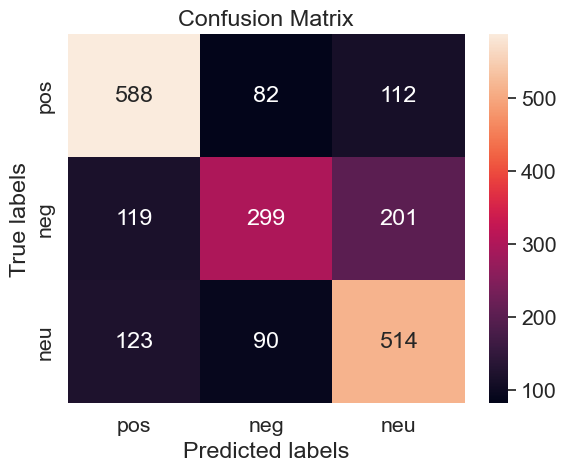

In [25]:
ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, predictiion), annot=True, fmt='d',xticklabels=['pos', 'neg', 'neu'] , yticklabels=['pos', 'neg', 'neu'] , ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()



In [26]:
import joblib

joblib.dump(text_classifier , r"C:\Users\Reza\Desktop\NLP_Classifier with SVM and Rainforest_Rezapour(98213017)\export_model\rf_model.joblib")


['C:\\Users\\Reza\\Desktop\\NLP_Classifier with SVM and Rainforest_Rezapour(98213017)\\export_model\\rf_model.joblib']